In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split


In [2]:
newCleanerSurveyFile='../datasets/new_hh_clean_w_survey.csv'
cleanSurvey_df=pd.read_csv(newCleanerSurveyFile)
cleanSurvey_df.head()

,Unnamed: 0,Unnamed: 0.1,Year,Provider ID,Agency Name,Street Address,City,State,Zip Code,Total Episodes (non-LUPA),...,Percent of Beneficiaries with Diabetes,Percent of Beneficiaries with Hyperlipidemia,Percent of Beneficiaries with IHD,Percent of Beneficiaries with Osteoporosis,Percent of Beneficiaries with RA/OA,Percent of Beneficiaries with Schizophrenia,Percent of Beneficiaries with Stroke,risk_categorical,CMS Certification Number (CCN),Star Rating for how patients rated overall care from agency
0,0,1,2016,17009,0,0,BIRMINGHAM,AL,35216,12879,...,0.4512,0.6743,0.5644,0.1329,0.6463,0.0523,0.1276,2,17009,4
1,1,10140,2015,17009,0,0,BIRMINGHAM,AL,35216,12948,...,0.4600,0.6400,0.5700,0.1400,0.6100,0.0800,0.1300,2,17009,4
2,2,20666,2014,17009,0,0,BIRMINGHAM,AL,35216,11823,...,0.4500,0.6300,0.5700,0.1500,0.6100,0.0900,0.1300,2,17009,4
3,3,31533,2013,17009,0,0,BIRMINGHAM,AL,35216,12012,...,0.4500,0.6200,0.5700,0.1500,0.5900,0.0900,0.1400,2,17009,4
4,4,2,2016,17013,0,0,ENTERPRISE,AL,36330,1236,...,0.4526,0.6618,0.5114,0.1650,0.6716,0.0523,0.1275,2,17013,4


In [6]:
cleanSurvey_df.count().head()

Unnamed: 0      21508
Unnamed: 0.1    21508
Year            21508
Provider ID     21508
Agency Name     21508
dtype: int64

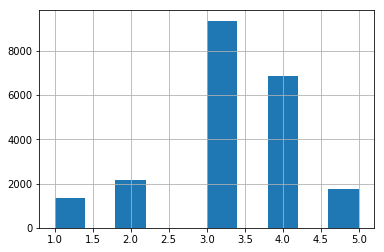

In [122]:
cleanSurvey_df['Star Rating for how patients rated overall care from agency'].hist(bins=10)

In [19]:
cleanSurvey_df['Star Rating for how patients rated overall care from agency'].describe()

count    21508.000000
mean         3.256974
std          0.967859
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: Star Rating for how patients rated overall care from agency, dtype: float64

In [112]:
cleanSurvey_df['Star Rating for how patients rated overall care from agency'].unique()

array([4, 3, 5, 2, 1], dtype=int64)

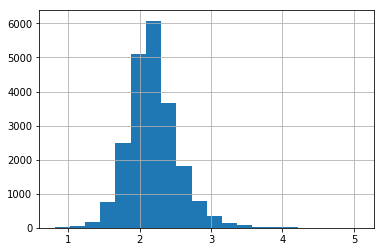

In [13]:
cleanSurvey_df['Average HCC Score'].hist(bins=20)

In [20]:
cleanSurvey_df['Average HCC Score'].describe()

count    21508.000000
mean         2.186107
std          0.349181
min          0.810000
25%          1.960000
50%          2.160000
75%          2.380000
max          5.070000
Name: Average HCC Score, dtype: float64

In [135]:
cleanSurvey_df['Average HCC Score'].unique()

array([2.26, 2.33, 2.16, 2.14, 1.98, 2.  , 1.91, 1.89, 2.18, 2.13, 1.87,
       1.86, 2.01, 2.2 , 2.31, 2.08, 2.06, 2.09, 1.92, 1.99, 2.19, 2.04,
       2.45, 2.38, 2.17, 2.37, 2.21, 2.07, 1.96, 1.79, 2.24, 2.12, 2.22,
       2.48, 2.32, 2.15, 2.05, 1.78, 1.82, 2.78, 1.88, 1.95, 1.83, 1.97,
       1.85, 1.74, 1.71, 2.11, 2.3 , 2.02, 1.93, 2.25, 1.94, 1.75, 2.23,
       2.54, 2.46, 2.59, 2.76, 2.42, 2.51, 1.8 , 1.59, 1.72, 1.84, 2.03,
       1.9 , 1.68, 2.55, 1.67, 1.77, 2.27, 1.63, 2.4 , 1.61, 1.65, 2.71,
       2.29, 2.28, 2.1 , 2.72, 2.65, 2.36, 1.73, 2.67, 1.81, 2.34, 1.44,
       2.35, 1.64, 2.49, 2.52, 2.53, 2.5 , 3.1 , 1.35, 1.52, 1.56, 1.53,
       2.44, 2.62, 3.02, 3.16, 3.04, 1.46, 1.43, 2.47, 2.61, 2.64, 1.37,
       1.76, 2.39, 2.43, 2.66, 2.58, 2.57, 3.22, 2.9 , 2.56, 2.7 , 2.41,
       1.62, 1.38, 1.45, 3.39, 2.97, 3.05, 2.77, 2.82, 1.26, 1.41, 3.03,
       2.84, 2.85, 1.57, 1.6 , 1.69, 2.68, 1.55, 2.8 , 2.63, 2.83, 1.7 ,
       1.66, 3.11, 2.6 , 2.87, 2.69, 3.85, 3.31, 3.

Text(0,0.5,'HCC')

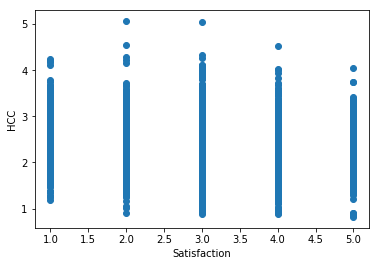

In [137]:
theY=cleanSurvey_df['Average HCC Score']
theX=cleanSurvey_df['Star Rating for how patients rated overall care from agency']
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(theX, theY)
plt.xlabel('Satisfaction')
plt.ylabel('HCC')

In [102]:
theHCC =cleanSurvey_df['Average HCC Score']
satisfaction=cleanSurvey_df['Star Rating for how patients rated overall care from agency'].values.reshape(-1,1)

In [103]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(
    satisfaction,
    theHCC,
    test_size=0.2,
    random_state=1
)
print('Training set has {} samples.'.format(X_train.shape[0]))
print('Testing set has {} samples'.format(X_test.shape[0]))

Training set has 17206 samples.
Testing set has 4302 samples


In [104]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [105]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [106]:
from keras.models import Sequential
model = Sequential()

In [107]:
from keras.layers import Dense
model.add(Dense(units=6,activation='relu',input_dim=1))
model.add(Dense(units=6,activation='relu'))

In [108]:
model.add(Dense(units=1,activation='linear'))

In [109]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 6)                 12        
_________________________________________________________________
dense_14 (Dense)             (None, 6)                 42        
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 7         
Total params: 61
Trainable params: 61
Non-trainable params: 0
_________________________________________________________________


In [110]:
model.compile(optimizer='adam', loss='mse')

In [111]:
model.fit(
    X_train_scaled,
    y_train,
    epochs=100,
    shuffle=True,
    verbose=2
)

Epoch 1/100
 - 1s - loss: 1.3346
Epoch 2/100
 - 0s - loss: 0.1555
Epoch 3/100
 - 0s - loss: 0.1261
Epoch 4/100
 - 0s - loss: 0.1226
Epoch 5/100
 - 0s - loss: 0.1206
Epoch 6/100
 - 1s - loss: 0.1195
Epoch 7/100
 - 0s - loss: 0.1192
Epoch 8/100
 - 0s - loss: 0.1189
Epoch 9/100
 - 0s - loss: 0.1189
Epoch 10/100
 - 0s - loss: 0.1189
Epoch 11/100
 - 0s - loss: 0.1190
Epoch 12/100
 - 0s - loss: 0.1188
Epoch 13/100
 - 0s - loss: 0.1189
Epoch 14/100
 - 0s - loss: 0.1191
Epoch 15/100
 - 0s - loss: 0.1188
Epoch 16/100
 - 0s - loss: 0.1189
Epoch 17/100
 - 0s - loss: 0.1188
Epoch 18/100
 - 0s - loss: 0.1189
Epoch 19/100
 - 0s - loss: 0.1190
Epoch 20/100
 - 0s - loss: 0.1189
Epoch 21/100
 - 0s - loss: 0.1191
Epoch 22/100
 - 0s - loss: 0.1190
Epoch 23/100
 - 0s - loss: 0.1189
Epoch 24/100
 - 0s - loss: 0.1190
Epoch 25/100
 - 0s - loss: 0.1190
Epoch 26/100
 - 0s - loss: 0.1190
Epoch 27/100
 - 0s - loss: 0.1188
Epoch 28/100
 - 0s - loss: 0.1188
Epoch 29/100
 - 0s - loss: 0.1189
Epoch 30/100
 - 0s - lo

In [114]:
model_loss =model.evaluate(
    X_test_scaled,
    y_test,
    verbose=2
)
print(f'Loss: {model_loss}')

Loss: 0.11634584620200109


([<matplotlib.axis.YTick at 0x2ca13d3def0>,
 <a list of 5 Text yticklabel objects>)

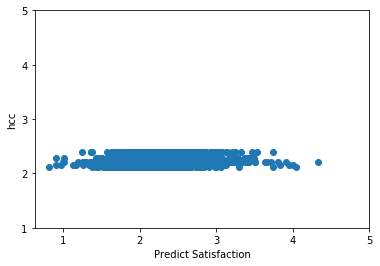

In [141]:

plt.scatter(y_test,model.predict(X_test_scaled))
#plt.ylim=(1,3)
plt.xlim=([0,6])
plt.ylabel('hcc')
plt.xlabel('Predict Satisfaction')
plt.xticks([1,2,3,4,5])
plt.yticks([1,2,3,4,5])

In [138]:
y_test.describe()

count    4302.000000
mean        2.185625
std         0.345743
min         0.810000
25%         1.960000
50%         2.160000
75%         2.380000
max         4.330000
Name: Average HCC Score, dtype: float64